<a href="https://colab.research.google.com/github/siddh30/Home_Credit_Default_Risk/blob/master/Home_Credit_Default_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<div align="center"> HOME CREDIT DEFAULT RISK </div>**
<div align="center"> A machine learning classification project to predict the repayment abilities of several clients of Home Credit </div>

### 1) **Data Collection**

**Importing the data using Kaggle Api**

In [0]:
from google.colab import files
files.upload() #upload a json file

In [2]:
!ls -lha kaggle.json #kaggle file is present or not

-rw-r--r-- 1 root root 71 Apr 30 03:17 kaggle.json


In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle competitions download -c home-credit-default-risk

 61% 22.0M/36.1M [00:00<00:00, 84.0MB/s]
100% 36.1M/36.1M [00:00<00:00, 121MB/s] 
  0% 0.00/524k [00:00<?, ?B/s]
100% 524k/524k [00:00<00:00, 165MB/s]
 65% 24.0M/36.8M [00:00<00:00, 34.6MB/s]
100% 36.8M/36.8M [00:00<00:00, 92.9MB/s]
 95% 258M/271M [00:01<00:00, 159MB/s]
100% 271M/271M [00:01<00:00, 165MB/s]
 97% 105M/109M [00:01<00:00, 104MB/s]  
100% 109M/109M [00:01<00:00, 86.5MB/s]
  0% 0.00/5.81M [00:00<?, ?B/s]
100% 5.81M/5.81M [00:00<00:00, 95.3MB/s]
 86% 49.0M/56.8M [00:00<00:00, 85.6MB/s]
100% 56.8M/56.8M [00:00<00:00, 125MB/s] 
  0% 0.00/36.5k [00:00<?, ?B/s]
100% 36.5k/36.5k [00:00<00:00, 38.1MB/s]
 89% 86.0M/96.7M [00:00<00:00, 123MB/s]
100% 96.7M/96.7M [00:00<00:00, 140MB/s]
 92% 70.0M/76.3M [00:00<00:00, 126MB/s]
100% 76.3M/76.3M [00:00<00:00, 130MB/s]


**Unzipping the csvs**

In [8]:
!unzip 'application_train.csv.zip'
!unzip 'application_test.csv.zip'


Archive:  application_train.csv.zip
  inflating: application_train.csv   
Archive:  application_test.csv.zip
  inflating: application_test.csv    


### 2) **Data Pre-Processing**

 **Using Pandas to Create a Dataframe** 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
application_train = pd.read_csv('application_train.csv')
application_test = pd.read_csv('application_test.csv')

**Analayzing and Preprocessing the data**

In [11]:
print('Size of application_train data', application_train.shape)
print('Size of application_test',application_test.shape)

Size of application_train data (307511, 122)
Size of application_test (48744, 121)


In [12]:
display(application_train.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
display(application_test.head())

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


**Analysing and removing the missing values**

In [0]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [15]:
missing_values = missing_values_table(application_train)
missing_values.head(10)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [16]:
missing_values = missing_values_table(application_test)
missing_values.head(10)

Your selected dataframe has 121 columns.
There are 64 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,33495,68.7
COMMONAREA_MEDI,33495,68.7
COMMONAREA_AVG,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
FONDKAPREMONT_MODE,32797,67.3
LIVINGAPARTMENTS_MODE,32780,67.2
LIVINGAPARTMENTS_MEDI,32780,67.2
LIVINGAPARTMENTS_AVG,32780,67.2


In [17]:
application_train = application_train.dropna()
application_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,463500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009657,-15406,-892,-341.0,-4176,22.0,1,1,0,1,0,0,Laborers,2.0,2,2,MONDAY,18,0,0,0,0,0,0,...,0.1214,0.0949,0.0000,0.0000,reg oper account,block of flats,0.1324,"Stone, brick",No,2.0,1.0,2.0,1.0,-2053.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,198000.0,Family,Working,Secondary / secondary special,Separated,House / apartment,0.018850,-16282,-4375,-762.0,-1494,8.0,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,11,0,0,0,0,0,0,...,0.0770,0.0919,0.0000,0.0000,reg oper spec account,block of flats,0.0710,Panel,No,6.0,0.0,6.0,0.0,-1782.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.031329,-11375,-2311,-180.0,-2009,4.0,1,1,0,1,0,0,Managers,2.0,2,2,MONDAY,13,0,0,0,0,0,0,...,0.4361,0.7317,0.2213,0.7892,reg oper account,block of flats,0.7334,Monolithic,No,0.0,0.0,0.0,0.0,-1792.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,238500.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.022625,-13972,-4472,-464.0,-4529,3.0,1,1,0,1,1,0,Laborers,2.0,2,2,THURSDAY,16,0,0,0,0,0,0,...,0.2565,0.3628,0.0000,0.0172,reg oper account,block of flats,0.4064,Panel,No,5.0,0.0,5.0,0.0,-1161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,774000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.072508,-11356,-602,-335.0,-3224,9.0,1,1,0,1,0,0,Laborers,2.0,1,1,MONDAY,14,1,0,1,0,0,0,...,0.1975,0.2310,0.0078,0.0077,reg oper account,block of flats,0.1874,Panel,No,3.0,0.0,3.0,0.0,-14.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0


In [18]:
application_test = application_test.dropna()
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
15,100107,Cash loans,M,Y,Y,0,180000.0,296280.0,21690.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.032561,-13563,-1007,-5719.0,-4044,14.0,1,1,0,1,0,1,Laborers,2.0,1,1,TUESDAY,15,0,0,0,0,0,0,Business Entity Type 3,...,0.0291,0.0624,0.0078,0.0007,reg oper account,block of flats,0.0484,"Stone, brick",No,2.0,0.0,2.0,0.0,-317.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
18,100128,Cash loans,F,Y,Y,1,225000.0,431280.0,23526.0,360000.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,With parents,0.025164,-10962,-1883,-99.0,-1721,8.0,1,1,0,1,0,1,Managers,3.0,2,2,THURSDAY,10,0,0,0,0,0,0,Bank,...,0.0906,0.1004,0.0000,0.0288,reg oper account,block of flats,0.0837,Panel,No,5.0,0.0,5.0,0.0,-1616.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0,4.0
73,100561,Cash loans,M,Y,Y,0,180000.0,67500.0,8140.5,67500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.015221,-11819,-2612,-9781.0,-4134,3.0,1,1,0,1,1,0,Laborers,2.0,2,2,FRIDAY,12,0,0,0,0,0,0,Business Entity Type 3,...,0.1231,0.1567,0.0000,0.0000,reg oper account,block of flats,0.1522,Panel,No,3.0,0.0,3.0,0.0,-1257.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
86,100699,Cash loans,M,Y,Y,1,225000.0,323460.0,23134.5,270000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.020246,-13444,-1659,-2988.0,-4436,8.0,1,1,0,1,0,0,Laborers,3.0,3,3,WEDNESDAY,7,0,0,0,0,0,0,Other,...,0.0761,0.0988,0.0000,0.0000,reg oper account,block of flats,0.0858,Panel,No,3.0,0.0,3.0,0.0,-1901.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
102,100770,Cash loans,M,Y,N,0,202500.0,697500.0,33687.0,697500.0,Unaccompanied,Working,Incomplete higher,Married,With parents,0.015221,-8819,-852,-2751.0,-1476,4.0,1,1,0,1,1,0,Sales staff,2.0,2,2,WEDNESDAY,8,0,0,0,0,0,0,Construction,...,0.0829,0.1202,0.0116,0.0145,org spec account,block of flats,0.0893,Panel,No,0.0,0.0,0.0,0.0,-1615.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Analyzing the unique values of each feature for train and test dataset**

In [19]:
application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   1
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               3
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             55
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Text(0, 0.5, 'No of Unique Values')

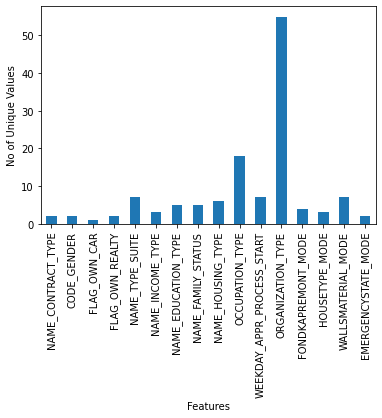

In [20]:
plot = application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0).plot.bar()
plot.set_xlabel('Features')
plot.set_ylabel('No of Unique Values')

In [21]:
application_test.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   1
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               3
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             53
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Text(0, 0.5, 'No of Unique Values')

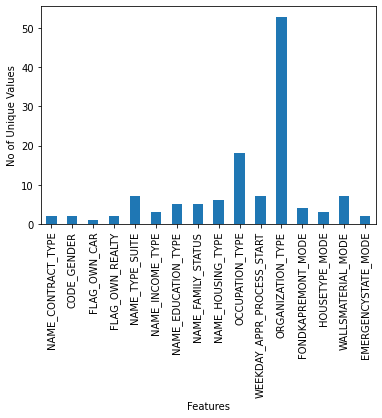

In [22]:
plot = application_test.select_dtypes('object').apply(pd.Series.nunique, axis = 0).plot.bar()
plot.set_xlabel('Features')
plot.set_ylabel('No of Unique Values')

 We realise that Organization_Type has more in **the training dataset** has more unique values than in **the test dataset**.

In [23]:
application_train['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'Self-employed', 'Trade: type 7',
       'Government', 'Industry: type 2', 'Bank', 'Kindergarten',
       'Transport: type 3', 'Business Entity Type 2', 'Trade: type 3',
       'Transport: type 4', 'Industry: type 9', 'Medicine', 'Other',
       'Hotel', 'Services', 'Construction', 'School', 'Transport: type 2',
       'Trade: type 2', 'Business Entity Type 1', 'Housing', 'Police',
       'Trade: type 6', 'Restaurant', 'Military', 'Industry: type 11',
       'Agriculture', 'Security', 'Electricity', 'Telecom', 'Mobile',
       'Postal', 'Security Ministries', 'Transport: type 1',
       'Industry: type 7', 'University', 'Advertising', 'Realtor',
       'Industry: type 10', 'Insurance', 'Industry: type 5',
       'Industry: type 1', 'Legal Services', 'Religion',
       'Industry: type 12', 'Industry: type 4', 'Industry: type 3',
       'Emergency', 'Cleaning', 'Trade: type 1', 'Culture',
       'Trade: type 4', 'Industry: type 8', 'Industry: type 6'],
  

In [24]:
(application_test['ORGANIZATION_TYPE'].unique())

array(['Business Entity Type 3', 'Bank', 'Other', 'Construction',
       'Self-employed', 'Transport: type 4', 'Business Entity Type 2',
       'Kindergarten', 'Transport: type 3', 'Industry: type 3',
       'Industry: type 9', 'Government', 'Medicine', 'Restaurant',
       'School', 'Telecom', 'Police', 'Security Ministries',
       'Trade: type 7', 'Business Entity Type 1', 'Industry: type 7',
       'Postal', 'Trade: type 2', 'Housing', 'Military',
       'Industry: type 4', 'Transport: type 2', 'Trade: type 3',
       'Security', 'Mobile', 'Electricity', 'Emergency',
       'Industry: type 11', 'University', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Industry: type 2', 'Services',
       'Industry: type 5', 'Insurance', 'Agriculture', 'Culture',
       'Industry: type 1', 'Industry: type 12', 'Trade: type 6',
       'Trade: type 5', 'Trade: type 1', 'Realtor', 'Hotel',
       'Transport: type 1', 'Industry: type 6', 'Trade: type 4'],
      dtype=object)

In [0]:
def returnNotMatches(a, b):
    return [[x for x in a if x not in b], [x for x in b if x not in a]]

In [26]:
returnNotMatches(application_train['ORGANIZATION_TYPE'].unique(),application_test['ORGANIZATION_TYPE'].unique())

[['Religion', 'Cleaning', 'Industry: type 8'], ['Trade: type 5']]

**Religion, Cleaning and Industry: type 8** are present in the **ORGANIZATION_TYPE** feature of **training dataset** and not in **test datatset** whereas **Trade: type 5** is present in the **test dataset** and not in the **training dataset**.

### 3) **One Hot Encoding**

**Training Dataset**

In [27]:
count = 0  
for i in  application_train.loc[:, application_train.dtypes == object]:
   col = application_train[i] 
   i = pd.get_dummies(prefix = i, data = col)
   if count == 0:
    data_one_hot = i
   else:
    data_one_hot = pd.concat([data_one_hot,i],axis=1)
   count += 1

data_one_hot = data_one_hot.drop(columns = ['ORGANIZATION_TYPE_Religion','ORGANIZATION_TYPE_Cleaning','ORGANIZATION_TYPE_Industry: type 8'],axis=1)

application_train = application_train.drop(columns = application_train.loc[:, application_train.dtypes == object],axis=1)
application_train = pd.concat([application_train,data_one_hot],axis=1)
application_train.info()
application_train.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 71 to 307482
Columns: 232 entries, SK_ID_CURR to EMERGENCYSTATE_MODE_Yes
dtypes: float64(65), int64(41), uint8(126)
memory usage: 8.1 MB


(8602, 232)

In [28]:
application_train

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
71,100083,0,0,103500.0,573628.5,24435.0,463500.0,0.009657,-15406,-892,-341.0,-4176,22.0,1,1,0,1,0,0,2.0,2,2,18,0,0,0,0,0,0,0.270766,0.707126,0.597192,0.1464,0.1291,0.9861,0.8096,0.1080,0.04,0.0345,0.3333,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
124,100145,0,1,202500.0,260725.5,16789.5,198000.0,0.018850,-16282,-4375,-762.0,-1494,8.0,1,1,0,1,0,0,2.0,2,2,11,0,0,0,0,0,0,0.647045,0.746486,0.739412,0.0928,0.1000,0.9801,0.7280,0.0463,0.00,0.2069,0.1667,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0
152,100179,0,0,202500.0,675000.0,53329.5,675000.0,0.031329,-11375,-2311,-180.0,-2009,4.0,1,1,0,1,0,0,2.0,2,2,13,0,0,0,0,0,0,0.674832,0.616156,0.673830,0.5845,0.4570,0.9945,0.9252,0.3468,0.60,0.2414,0.9167,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
161,100190,0,0,162000.0,263686.5,24781.5,238500.0,0.022625,-13972,-4472,-464.0,-4529,3.0,1,1,0,1,1,0,2.0,2,2,16,0,0,0,0,0,0,0.534999,0.585859,0.788681,0.3093,0.1973,0.9891,0.8504,0.0000,0.40,0.2414,0.4583,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
255,100295,1,1,225000.0,1019205.0,31032.0,774000.0,0.072508,-11356,-602,-335.0,-3224,9.0,1,1,0,1,0,0,2.0,1,1,14,1,0,1,0,0,0,0.262005,0.302394,0.463275,0.2402,0.1098,0.9916,0.8844,0.4682,0.40,0.1724,0.5417,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,2,112500.0,361462.5,16051.5,274500.0,0.025164,-15006,-1105,-1806.0,-2465,9.0,1,1,0,1,0,0,4.0,2,2,9,0,0,0,0,1,1,0.653115,0.418337,0.758393,0.0639,0.0728,0.9970,0.9524,0.2022,0.00,0.1552,0.1667,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
307359,456084,0,1,99000.0,675000.0,21906.0,675000.0,0.0

**Test Dataset**

In [29]:
count = 0  
for i in  application_test.loc[:, application_test.dtypes == object]:
   col = application_test[i] 
   i = pd.get_dummies(prefix = i, data = col)
   if count == 0:
    data_one_hot = i
   else:
    data_one_hot = pd.concat([data_one_hot,i],axis=1)
   count += 1
data_one_hot.info()
data_one_hot = data_one_hot.drop(columns = ['ORGANIZATION_TYPE_Trade: type 5'],axis=1)

application_test = application_test.drop(columns = application_test.loc[:, application_test.dtypes == object],axis=1)
application_test = pd.concat([application_test,data_one_hot],axis=1)
application_test.info()
application_test.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 15 to 48710
Columns: 127 entries, NAME_CONTRACT_TYPE_Cash loans to EMERGENCYSTATE_MODE_Yes
dtypes: uint8(127)
memory usage: 229.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 15 to 48710
Columns: 231 entries, SK_ID_CURR to EMERGENCYSTATE_MODE_Yes
dtypes: float64(65), int64(40), uint8(126)
memory usage: 1.6 MB


(1739, 231)

In [30]:
application_test

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
15,100107,0,180000.0,296280.0,21690.0,225000.0,0.032561,-13563,-1007,-5719.0,-4044,14.0,1,1,0,1,0,1,2.0,1,1,15,0,0,0,0,0,0,0.344165,0.684407,0.263647,0.0371,0.0361,0.9513,0.3336,0.0132,0.00,0.1379,0.1250,0.1667,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
18,100128,1,225000.0,431280.0,23526.0,360000.0,0.025164,-10962,-1883,-99.0,-1721,8.0,1,1,0,1,0,1,3.0,2,2,10,0,0,0,0,0,0,0.339002,0.375073,0.347418,0.1093,0.0464,0.9881,0.8368,0.0000,0.12,0.1034,0.3750,0.4167,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
73,100561,0,180000.0,67500.0,8140.5,67500.0,0.015221,-11819,-2612,-9781.0,-4134,3.0,1,1,0,1,1,0,2.0,2,2,12,0,0,0,0,0,0,0.379074,0.273194,0.218859,0.1485,0.1048,0.9866,0.8164,0.0569,0.16,0.1379,0.3333,0.3750,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
86,100699,1,225000.0,323460.0,23134.5,270000.0,0.020246,-13444,-1659,-2988.0,-4436,8.0,1,1,0,1,0,0,3.0,3,3,7,0,0,0,0,0,0,0.658198,0.364307,0.641368,0.0918,0.1513,0.9816,0.7484,0.0173,0.00,0.1379,0.1667,0.2083,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
102,100770,0,202500.0,697500.0,33687.0,697500.0,0.015221,-8819,-852,-2751.0,-1476,4.0,1,1,0,1,1,0,2.0,2,2,8,0,0,0,0,0,0,0.176322,0.575642,0.300108,0.1072,0.0785,0.9871,0.8844,0.0683,0.12,0.1034,0.3542,0.4167,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48628,455243,1,112500.0,252531.0,26005.5,234000.0,0.016612,-10205,-2038,-4491.0,-2512,6.0,1,1,0,1,0,0,3.0,2,2,14,0,0,0,0,0,0,0.327700,0.442370,0.703203,0.1918,0.0355,0.9742,0.6464,0.0868,0.20,0.1724,0.3333,0.3750,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0
48670,455607,0,387000.0,

### 4) **Applying Machine Learning (Supervised - For Classification)**

### **A. Linear Models**

#### *Logistic Regression*

In [0]:
from sklearn.linear_model import LogisticRegression

In [32]:
#training labels/ Target Variable
train_final = application_train.drop(columns=['TARGET'],axis=1)
test_final = application_test
train_labels = application_train['TARGET']
train_labels

71        0
124       0
152       0
161       0
255       1
         ..
307358    0
307359    0
307407    1
307456    0
307482    0
Name: TARGET, Length: 8602, dtype: int64

In [33]:
# Make the model with the specified regularization parameter
log_reg = LogisticRegression(class_weight = 'balanced')

# Train on the training data
log_reg.fit(train_final, train_labels)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

 **Checking The Training Accuracy**

In [0]:
predictions = log_reg.predict(train_final)
p = pd.Series(predictions)


In [35]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(train_labels, predictions)
roc_value

0.5829496211843005

**Generating Test Predictions**

In [36]:
predictions = log_reg.predict(application_test)
p = pd.Series(predictions)
p

0       1
1       0
2       0
3       0
4       0
       ..
1734    1
1735    0
1736    1
1737    1
1738    0
Length: 1739, dtype: int64

####  *Naive Bayes* 

In [37]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB(var_smoothing=1e-13)
model.fit(train_final, train_labels)

GaussianNB(priors=None, var_smoothing=1e-13)

 **Checking The Training Accuracy**

In [38]:
predictions = model.predict(train_final)
p = pd.Series(predictions)
p.unique()

array([1, 0])

In [39]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(train_labels, predictions)
roc_value

0.6507800420718007

**Generating Test Predictions**

In [40]:
predictions = log_reg.predict(application_test)
p = pd.Series(predictions)
p.unique()

array([1, 0])

### **B. Non-Linear Models**

#### *K-Nearest Neighbours*

In [0]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [42]:
neigh = KNN(algorithm = 'brute', n_neighbors=3, leaf_size=30,p=1) #Manhattan Distance
neigh.fit(train_final, train_labels)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')

 **Checking The Training Accuracy**

In [0]:
predictions = neigh.predict(train_final)

In [44]:
p = pd.Series(predictions)
p.unique()

array([0, 1])

In [45]:
from sklearn.metrics import roc_auc_score
# Calculate roc auc
roc_value = roc_auc_score(train_labels, predictions)
roc_value

0.5644349214778991

 **Generating Predictions**

In [46]:
predictions = neigh.predict(test_final)
p = pd.Series(predictions)
p.unique()

array([0, 1])

### **B. Trees and Ensemble**

#### *Decision Trees*

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
clf = DecisionTreeClassifier()

In [49]:
clf.fit(train_final,train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

 **Checking The Training Accuracy**

In [50]:
predictions = clf.predict(train_final)
p = pd.Series(predictions)
p.unique()

array([0, 1])

In [51]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(train_labels, predictions)
roc_value

1.0

**Generating Test Predictions**

In [52]:
predictions = log_reg.predict(test_final)
p = pd.Series(predictions)
p

0       1
1       0
2       0
3       0
4       0
       ..
1734    1
1735    0
1736    1
1737    1
1738    0
Length: 1739, dtype: int64

#### *Random Forest*

In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 5, random_state = 42)
# Train the model on training data
rf.fit(train_final, train_labels);

 **Checking The Training Accuracy**

In [54]:
predictions = rf.predict(train_final)
p = pd.Series(predictions)
p.unique()

array([0. , 0.6, 0.2, 1. , 0.8, 0.4])

In [55]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(train_labels, predictions)
roc_value 

0.9924661768333908

**Generating Test Predictions**

In [56]:
predictions = log_reg.predict(test_final)
p = pd.Series(predictions)
p

0       1
1       0
2       0
3       0
4       0
       ..
1734    1
1735    0
1736    1
1737    1
1738    0
Length: 1739, dtype: int64

 #### *Gradient Boosting*

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
gb_clf = GradientBoostingClassifier(n_estimators=400, learning_rate=0.7, max_depth=2, random_state=0)
gb_clf.fit(train_final,train_labels)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.7, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**Checking The Training Accuracy**

In [0]:
predictions = gb_clf.predict(train_final)

In [60]:
from sklearn.metrics import roc_auc_score
# Calculate roc auc
roc_value = roc_auc_score(train_labels, predictions)
roc_value

0.9410027269457266

**Generating Predictions** 

In [61]:
predictions = gb_clf.predict(test_final)
p = pd.Series(predictions)
p.unique()

array([0, 1])